<a href="https://colab.research.google.com/github/songwon0327/Python_project/blob/master/%EC%9D%91%EC%9A%A9%EC%88%98%ED%95%99_2022%EB%85%84_1%ED%95%99%EA%B8%B0_2020038014_%EC%9D%B4%EC%86%A1%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train2.csv') #train2.csv 불러오기
test = pd.read_csv('/content/test2.csv')
train.drop('id',inplace=True,axis=1) #'id'열 삭제
train.drop('Unnamed: 0',inplace=True,axis=1) #'Unnamed: 0'열 삭제
test.drop('id',inplace=True,axis=1) #'id'열 삭제
test.drop('Unnamed: 0',inplace=True,axis=1) #'Unnamed: 0'열 삭제

test.head()


,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,F,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.145,9
1,M,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.285,19
2,M,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.155,11
3,I,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.082,6
4,M,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.175,10


In [ ]:
print(train.shape)# 행, 열 개수
train.dtypes # 열 타입

(1127, 9)


Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [ ]:
descript = train.describe() #수치형 데이터들의 통계량
print(descript)

            Lenght     Diameter       Height  Whole Weight  Shucked Weight  \
count  1127.000000  1127.000000  1127.000000   1127.000000     1127.000000   
mean      0.522924     0.407036     0.139476      0.831996        0.358900   
std       0.121090     0.100372     0.039082      0.502113        0.225445   
min       0.110000     0.090000     0.030000      0.008000        0.002500   
25%       0.445000     0.345000     0.112500      0.440250        0.180750   
50%       0.540000     0.420000     0.140000      0.777500        0.326500   
75%       0.615000     0.480000     0.165000      1.167000        0.503500   
max       0.780000     0.630000     0.250000      2.779500        1.488000   

       Viscra Weight  Shell Weight       Target  
count    1127.000000   1127.000000  1127.000000  
mean        0.181458      0.239849     9.921029  
std         0.112655      0.142285     3.236664  
min         0.002000      0.003000     3.000000  
25%         0.092500      0.127500     8.000000

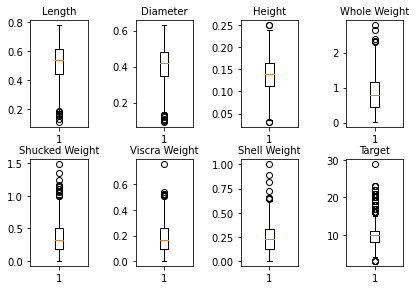

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)
ax8 = fig.add_subplot(2,4,8) 
# 세로 2, 가로 4 (총 8개) 그래프 생성
fig.tight_layout()

ax1.boxplot(train.iloc[:,1])
ax1.set_title('Length',fontsize=10)
ax2.boxplot(train.iloc[:,2])
ax2.set_title('Diameter',fontsize=10)
ax3.boxplot(train.iloc[:,3])
ax3.set_title('Height',fontsize=10)
ax4.boxplot(train.iloc[:,4])
ax4.set_title('Whole Weight',fontsize=10)
ax5.boxplot(train.iloc[:,5])
ax5.set_title('Shucked Weight',fontsize=10)
ax6.boxplot(train.iloc[:,6])
ax6.set_title('Viscra Weight',fontsize=10)
ax7.boxplot(train.iloc[:,7])
ax7.set_title('Shell Weight',fontsize=10)
ax8.boxplot(train.iloc[:,8])
ax8.set_title('Target',fontsize=10) 
#수치형 데이터들의 통계량 Boxplot으로 시각화

plt.show()

In [ ]:
train.groupby('Target').count().iloc[:,0]
# 나이 별 전복 분포

Target
3       4
4      14
5      35
6      78
7      92
8     156
9     183
10    181
11    129
12     68
13     58
14     38
15     21
16     19
17     13
18     10
19      7
20     10
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


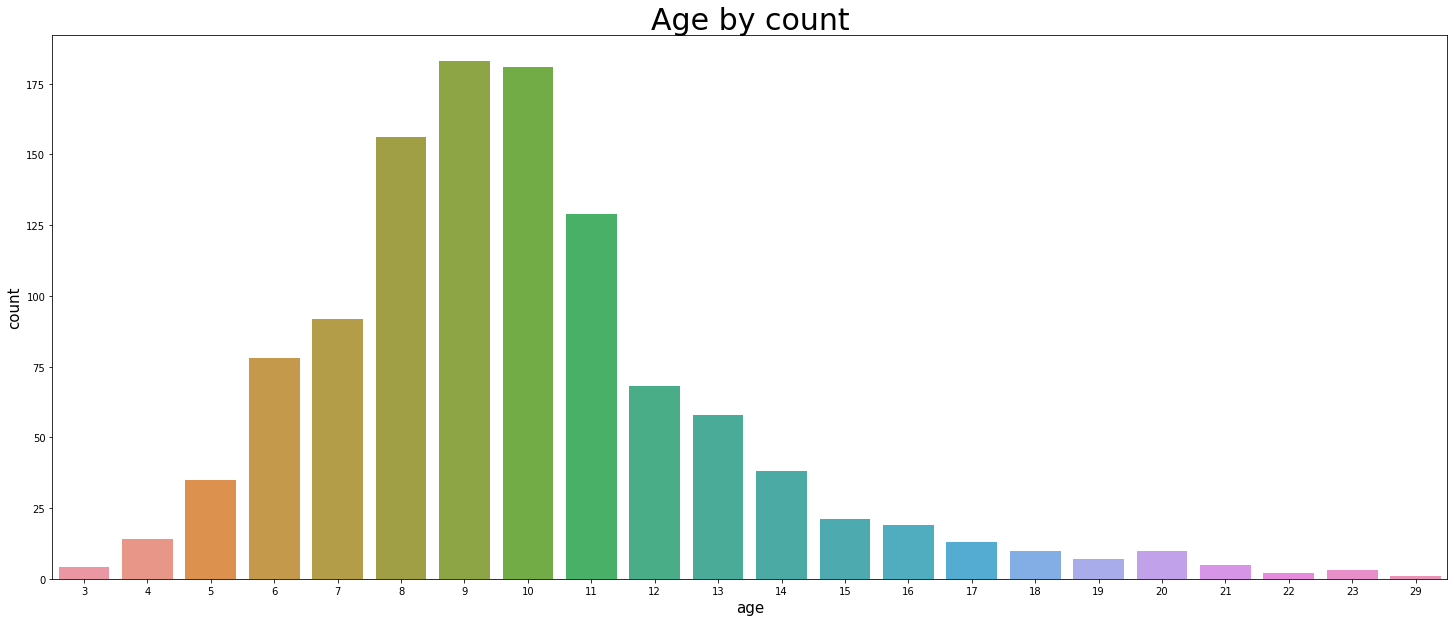

In [ ]:
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target',data=train)
# 전복 나이 countplot 생성
plt.title('Age by count',fontsize=30)
plt.xlabel('age',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

['M' 'F' 'I']
M=418
F=344
I=365


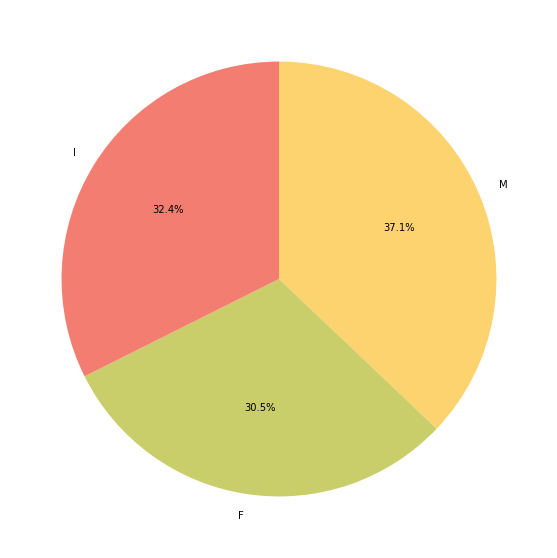

In [ ]:
print(train['Gender'].unique()) 
# 전복의 성별 구성
M = train[train['Gender'].str.contains('M')]
F = train[train['Gender'].str.contains('F')]
I = train[train['Gender'].str.contains('I')]
# 성별 별 전복 분포
print("M={0}".format(M.count().iloc[0]))
print("F={0}".format(F.count().iloc[0]))
print("I={0}".format(I.count().iloc[0]))

data = [M.count().iloc[0],F.count().iloc[0],I.count().iloc[0]]
labels = ['M','F','I']

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(1,1,1)

ax.pie(data, labels=labels, autopct='%.1f%%', colors = ['#FDD370','#C9CE6A','#F37D71'],
       counterclock=False, startangle=90)
plt.show() # 전복 성별 분포 비율 원 그래프로 시각화

In [ ]:
print(train.isnull().sum()) #결측치 확인
print('중복 개수')
print(train.duplicated().sum()) #중복 확인

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64
중복 개수
0


In [ ]:
arr = []
foreign= train["Whole Weight"]-(train["Shucked Weight"]+train["Shell Weight"]+train["Viscra Weight"])
#껍질 제외무게 + 껍질무게 + 내장 무게가 전복 전체무게보다 큰 데이터 값 삭제
cnt = foreign.count()
for i in range(cnt):
  if foreign.iloc[i] < 0:
    arr.append(i)
  i=i+1
print(arr)   

[3, 19, 39, 40, 76, 83, 164, 208, 274, 283, 341, 350, 367, 407, 488, 533, 557, 571, 606, 610, 650, 675, 683, 709, 737, 745, 802, 837, 840, 854, 873, 1002, 1063, 1072, 1105]


In [ ]:
for i in range(len(arr)):
  train = train.drop(arr[i],axis=0)
  i+=1

print(train.shape)

(1092, 9)


In [ ]:
arr2 = []
foreign2= test["Whole Weight"]-(test["Shucked Weight"]+test["Shell Weight"]+test["Viscra Weight"])
#껍질 제외무게 + 껍질무게 + 내장 무게가 전복 전체무게보다 큰 데이터 값 삭제
cnt = foreign2.count()
for i in range(cnt):
  if foreign2.iloc[i] < 0:
    arr2.append(i)
  i=i+1
print(arr2)  

[3, 10, 24, 37, 38, 110, 113]


In [ ]:
for i in range(len(arr2)):
  test = test.drop(arr2[i],axis=0)
  i+=1

print(test.shape)

(119, 9)


In [ ]:
#범주형 데이터 수치형 데이터로 변환 후 가변수화
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Gender_F,Gender_I,Gender_M
0,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14,0,0,1
1,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9,0,0,1
2,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9,1,0,0
4,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9,0,0,1
5,0.565,0.400,0.130,0.6975,0.3075,0.1665,0.1800,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1122,0.565,0.450,0.185,0.9285,0.3020,0.1805,0.2650,12,1,0,0
1123,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10,1,0,0
1124,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6,0,1,0
1125,0.590,0.455,0.150,0.9760,0.4650,0.2055,0.2765,10,1,0,0


In [ ]:
train["Foreign"] = round(train["Whole Weight"] - (train["Shucked Weight"] + train["Shell Weight"]+train["Viscra Weight"]),3) #전복 속 이물질 양
test["Foreign"] = round(test["Whole Weight"] - (test["Shucked Weight"] + test["Shell Weight"]+test["Viscra Weight"]),3)

train["Ratio"] = round((train["Shucked Weight"]) / train["Whole Weight"],3) #전체 무게 중 전복 순살의 비율 
test["Ratio"] = round((test["Shucked Weight"]) / test["Whole Weight"] ,3)

train = train[['Gender_M','Gender_F','Gender_I', 'Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Foreign', 'Ratio', 'Target']]#feature 재정렬
test = test[['Gender_M','Gender_F','Gender_I', 'Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Foreign', 'Ratio', 'Target']]
test

,Gender_M,Gender_F,Gender_I,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Foreign,Ratio,Target
0,0,1,0,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.1450,0.003,0.429,9
1,1,0,0,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.2850,0.072,0.364,19
2,1,0,0,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.1550,0.017,0.391,11
4,1,0,0,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.1750,0.036,0.399,10
5,0,0,1,0.370,0.275,0.140,0.2215,0.0970,0.0455,0.0615,0.017,0.438,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1,0,0,0.605,0.490,0.165,1.1245,0.4920,0.2220,0.3555,0.055,0.438,11
122,1,0,0,0.590,0.470,0.155,1.1735,0.6245,0.2330,0.2595,0.056,0.532,9
123,0,1,0,0.750,0.565,0.215,1.9380,0.7735,0.4825,0.5750,0.107,0.399,11
124,1,0,0,0.435,0.335,0.110,0.4385,0.2075,0.0715,0.1315,0.028,0.473,7


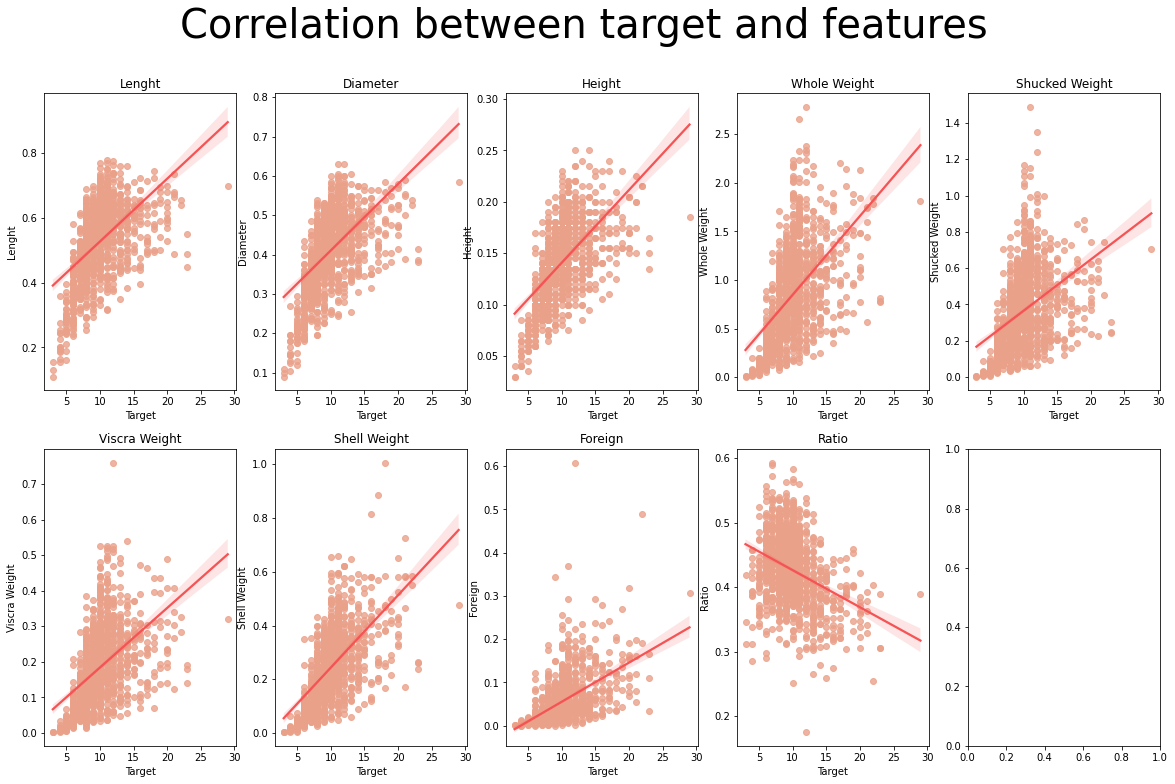

In [ ]:
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'} , ax = axx) 
  # regplot을 이용한 추세선과 산점도 그래프로 시각화
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize=40)
for i in range(len(train.columns[3:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+3])

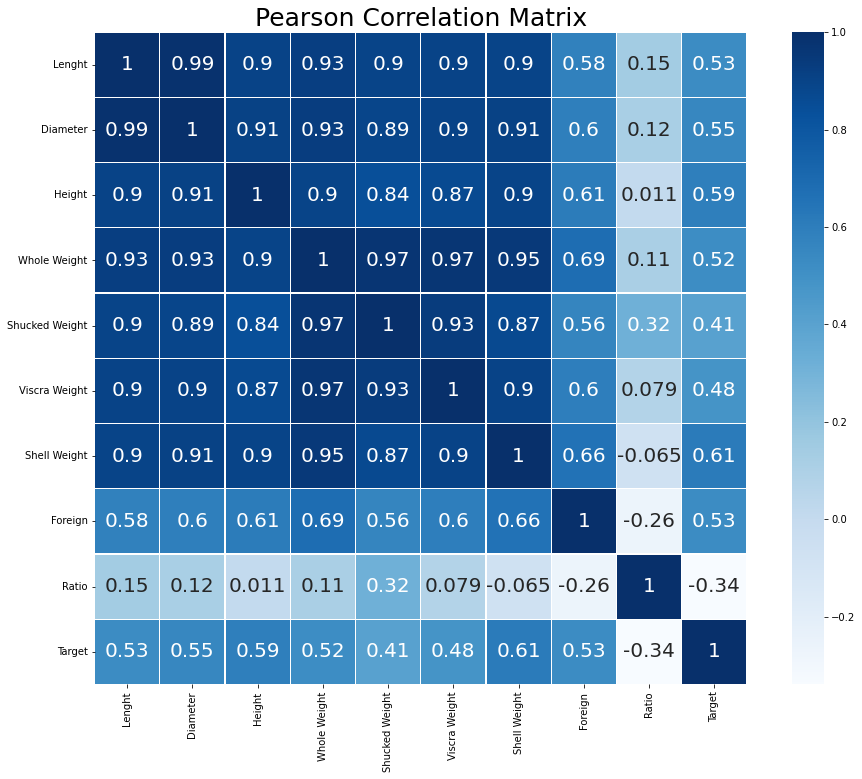

In [ ]:
features = ['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Foreign', 'Ratio', 'Target']
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train[features].corr(),
            linewidths=0.25,# 경계면 선구분
            vmax=1.0, # 컬러바 범위 
            square=True,
            cmap="Blues", #히트맵 색깔
            linecolor='w',# 라인 색
            
            annot=True, # 실제 값을 표시
            annot_kws={"size":20});

In [ ]:
# 데이터 분할
X = train.drop(columns = ['Target'], axis=1)
y = train['Target']

test_X = test.drop(columns = ['Target'], axis=1)
test_y = test['Target']
y

0       14
1        9
2        9
4        9
5        8
        ..
1122    12
1123    10
1124     6
1125    10
1126    10
Name: Target, Length: 1092, dtype: int64

In [ ]:
#NMAE 계산 함수
def NMAE(true,pred):
  mae = np.mean(np.abs(true-pred))
  score = mae / np.mean(np.abs(true))
  return score

In [ ]:
############ 학습 시작 ###########################
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators= 100)
model.fit(X,y)

pred = model.predict(test_X)
print(pred)

[ 9.46 13.67  9.78  9.75  7.92  8.51 12.57 11.25  7.85 13.62  7.92 11.46
 13.1   9.65  8.55  6.34 10.19  8.11  9.6   8.05 12.22 11.41  9.07  7.14
  9.35  9.13  8.67 14.92 12.37 10.12  8.89  7.05  7.    9.96 11.22  8.11
  8.18  6.09 11.41 11.08  7.07  9.35  9.63 10.33  8.01  9.4   6.68 11.42
 12.16  7.85 15.17 10.5   6.01  8.53 14.6   8.02 16.75 13.55  8.24  5.88
 12.86 12.82 10.53  9.5   8.83 10.78 10.    7.81 10.49 10.34 11.18 14.54
 10.61  6.02  9.05 10.73  7.31 10.41  7.26 10.14  6.3  10.97  8.47  9.64
  9.03 10.56  7.46 11.12 12.94 13.71 12.2   9.8  11.01  9.86 11.02  7.02
 10.55  4.17  8.99  9.78  9.34  5.88  9.47 10.58 11.74  7.38  6.26 10.4
  6.64 12.28 11.68  9.34 13.78 11.91 10.65  9.74 13.54  7.94  9.73]


In [ ]:
import pickle

with open('2020038014_이송원.model','wb') as fw:
  pickle.dump(model, fw)

In [ ]:
############# 테스트 시작 #####################
with open('2020038014_이송원.model','rb') as f:
  loaded_clf = pickle.load(f)
NMAE(test_y,pred)

0.1366098807495741

In [ ]:
from sklearn.metrics import r2_score

r2_score(test_y,pred)

0.6095591376087258